In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

In [7]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

[28.80963014]
-2.6660243456907557


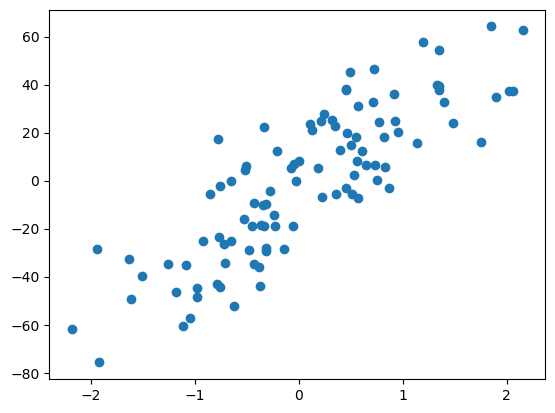

In [9]:
plt.scatter(X,y)

reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)


C:\Users\yetes\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\yetes\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\yetes\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.088e+04, tolerance: 7.538e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

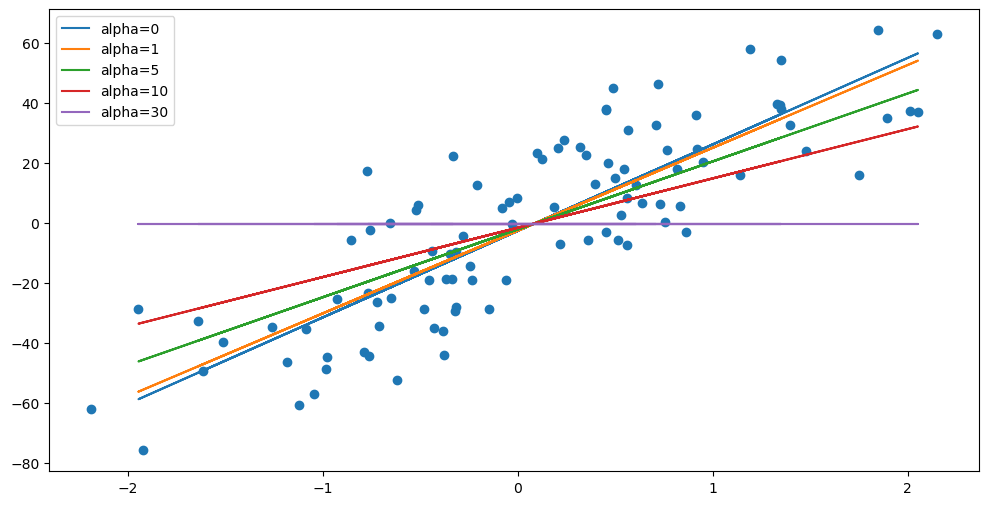

In [11]:
alpha = [0,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alpha:
    L = Lasso(alpha=i)
    L.fit(X_train,y_train)
    plt.plot(X_test,L.predict(X_test), label='alpha={}'.format(i))
plt.legend()
plt.show()    

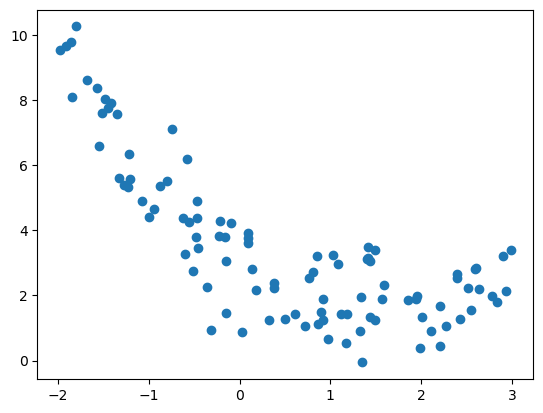

In [12]:
m =100
X1 = 5 * np.random.rand(m,1) - 2
X2 = 0.7 * X1 ** 2 - 2 * X1 + 3 + np.random.randn(m,1)

plt.scatter(X1,X2)
plt.show()

C:\Users\yetes\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\yetes\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\yetes\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.418e+01, tolerance: 5.881e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

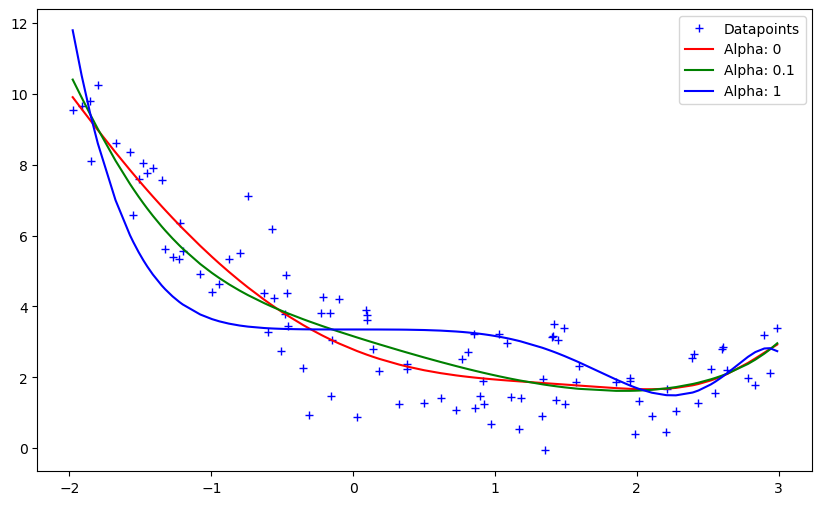

In [18]:
def get_preds_lasso(X1,X2,alpha):
    model = Pipeline([
        ('ploy_feats',PolynomialFeatures(degree=16)),
        ('lasso',Lasso(alpha=alpha))
    ])
    model.fit(X1,X2)
    return model.predict(X1)

alphas = [0,0.1,1]
cs = ['r','g','b']

plt.figure(figsize=(10,6))
plt.plot(X1,X2,'b+',label='Datapoints')

for alpha ,c in zip(alphas,cs):
    preds = get_preds_lasso(X1,X2,alpha)
    
    plt.plot(sorted(X1[:,0]),preds[np.argsort(X1[:,0])],c,label='Alpha: {}'.format(alpha))
    
plt.legend()
plt.show()